In [5]:
URL = "https://www.kaggle.com/datasets/city-of-seattle/seattle-fremont-bridge-hourly-bicycle-counts/download?datasetVersionNumber=4" 

In [6]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Frem.csv')

('Frem.csv', <http.client.HTTPMessage at 0x2761e320490>)

In [10]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_csv('fremont.csv', index_col='Date')
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03T00:00:00.000,13.0,4.0,9.0
2012-10-03T01:00:00.000,10.0,4.0,6.0
2012-10-03T02:00:00.000,2.0,1.0,1.0
2012-10-03T03:00:00.000,5.0,2.0,3.0
2012-10-03T04:00:00.000,7.0,6.0,1.0


In [13]:
### date are string so parse the date by pandas 

In [45]:
data = pd.read_csv('fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


<AxesSubplot:xlabel='Date'>

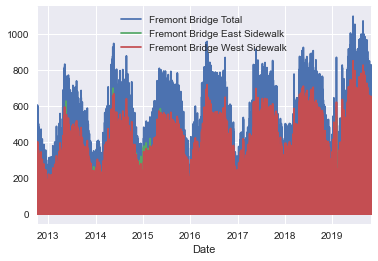

In [46]:
%matplotlib inline
data.plot()

<AxesSubplot:xlabel='Date'>

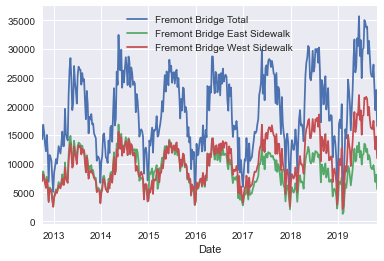

In [47]:
## see weekly data  w - week, d-day, m-month

data.resample('w').sum().plot()

<AxesSubplot:xlabel='Date'>

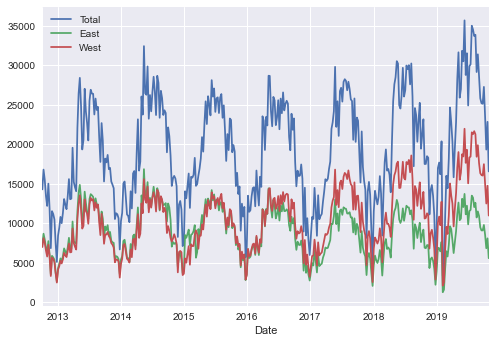

In [48]:
## change the plot style

import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ['Total', 'East', 'West']

data.resample('w').sum().plot()

<AxesSubplot:xlabel='Date'>

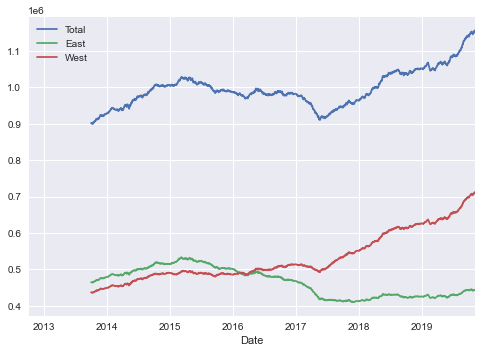

In [49]:
## see annual change

data.resample('D').sum().rolling(365).sum().plot()

(0.0, 1193490.25)

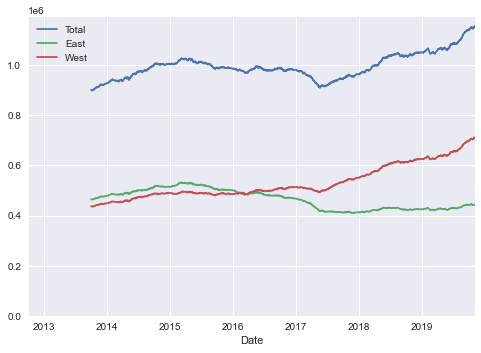

In [50]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)
# ax.set_xlim(2014, None)

(0.0, 1193490.25)

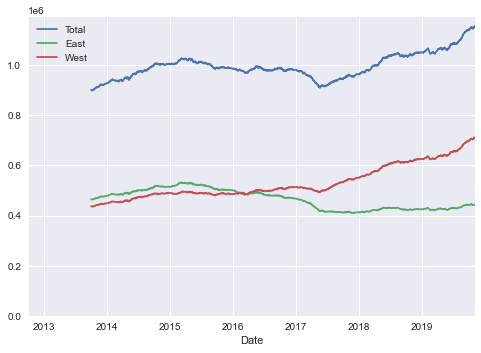

In [52]:
data['Total'] = data['West'] + data ['East']

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)
# ax.set_xlim(2014, None)

<AxesSubplot:xlabel='time'>

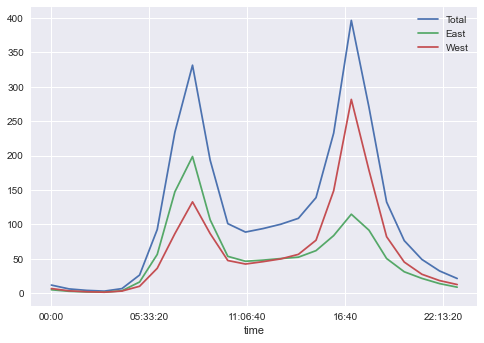

In [53]:
data.groupby(data.index.time).mean().plot()

In [54]:
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

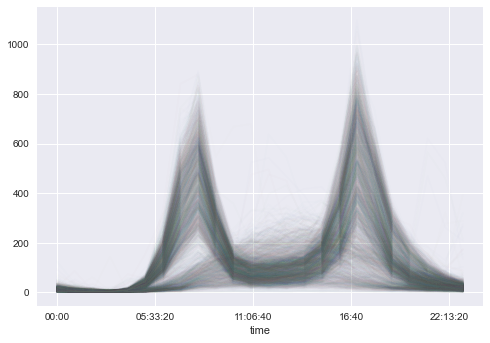

In [55]:
pivoted.plot(legend=False, alpha=0.01)